# Parallelized Calculations

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dehe1011/QuantumDNA/blob/main/docs/tutorials/4_Parallelization.ipynb)

This notebook demonstrates how to perform parallelized calculations for several properties, including:

* Exciton lifetime (in femtoseconds)
* Average charge separation between electron and hole (in Angstrom)
* Dipole moment (in Debye)
* Average exciton population on upper and lower DNA strands
  
As an example, the calculations are applied to all 64 possible DNA triplet sequences.

In [1]:
# %pip install qDNA
# from qDNA import ROOT_DIR

# This can be used alternatively if you cloned the GitHub repository
import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('QuantumDNA')]+ 'QuantumDNA'
os.chdir(ROOT_DIR)

In [14]:
import time
import numpy as np 
import matplotlib.pyplot as plt
from qDNA import calc_lifetime_dict, calc_dipole_dict, calc_dipole_moment_dict, calc_exciton_transfer_dict, create_upper_strands

upper_strands = create_upper_strands(3, ['A','T','G','C'])
tb_model_name = 'ELM'
filename = 'test'
kwargs = dict(relax_rate=3, unit='rad/ps')

In [18]:
# parallelized calculations
start = time.time()

calc_lifetime_dict(upper_strands, tb_model_name, filename, **kwargs)
calc_dipole_dict(tb_model_name, filename)
calc_dipole_moment_dict(tb_model_name, filename)
calc_exciton_transfer_dict(tb_model_name, filename)

end = time.time()
print(f"Time: {end - start}s") 

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:06<00:00, 10.05it/s]


Time: 27.55949354171753s


# Analysis

We make an analysis on these triplet sequences by 

In [20]:
# load the dictionaries 
from qDNA.tools import my_load

lifetime_dict = my_load(f"processed/lifetime_{filename}")
dipole_dict = my_load(f"processed/dipole_{filename}")
dipole_moment_dict = my_load(f"processed/dipole_moment_{filename}")
exciton_transfer_dict = my_load(f"processed/exciton_transfer_{filename}")

In [21]:
def normalize_dict_values(data):
    total = sum(data.values())
    return {key: value / total for key, value in data.items()}

# consider only the lower strand average exciton population
exciton_transfer_lower_dict = {key: value[1] for key, value in exciton_transfer_dict.items()}

dicts = [lifetime_dict, dipole_dict, dipole_moment_dict, exciton_transfer_lower_dict]
labels = ['Exciton lifetime', 'Charge separation', 'Dipole moment', 'Exciton Transfer']
# normalize the values 
dicts = [normalize_dict_values(dictionary) for dictionary in dicts]

C:\Users\Dennis Herb\AppData\Local\Temp\ipykernel_26812\631330690.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = dna_seqs, rotation=90)


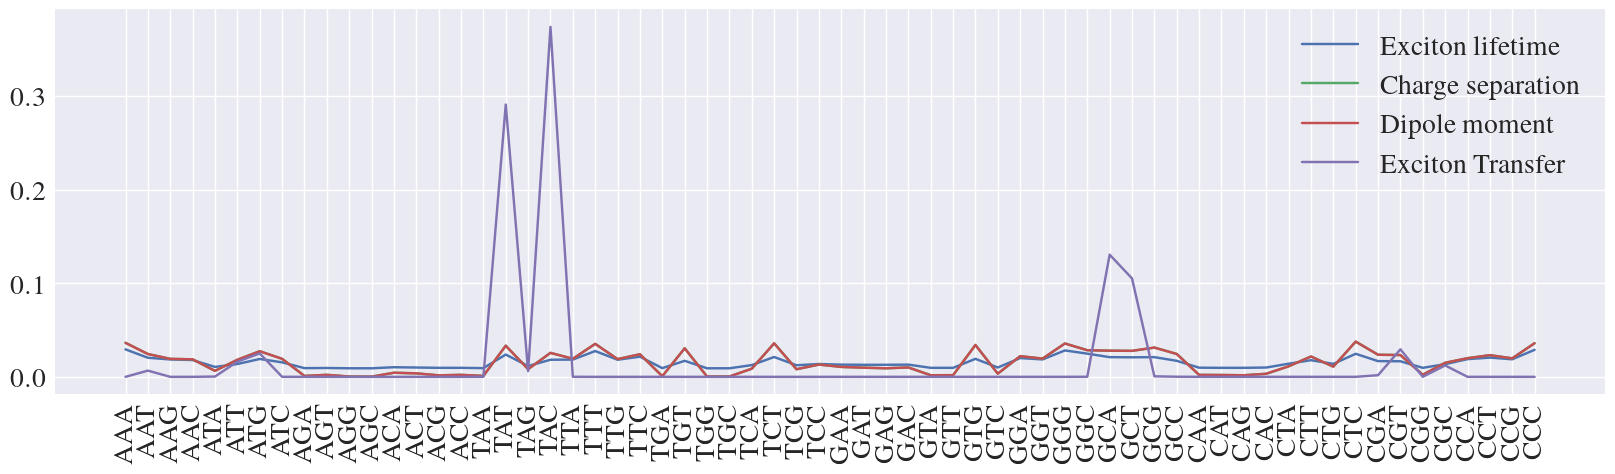

In [22]:
fig, ax = plt.subplots(figsize=(20,5))
for dictionary, label in zip(dicts, labels):
    ax.plot(dictionary.keys(), dictionary.values(), label=label)

dna_seqs = list(lifetime_dict.keys())
ax.set_xticklabels(labels = dna_seqs, rotation=90)
ax.legend()
plt.show()

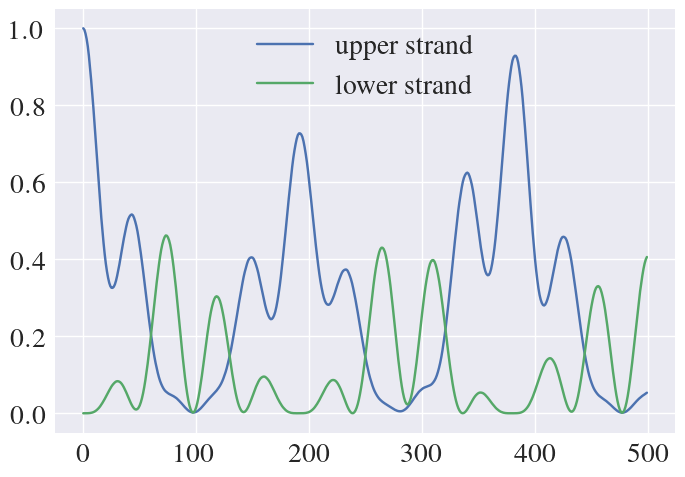

In [25]:
# The analysis above shows there are some intersting triplet sequences. Let's have a closer look.
from qDNA import calc_exciton_transfer

upper_strand ='TAT'
tb_model_name = 'ELM'
kwargs = dict()

pop_upper_strand, pop_lower_strand = calc_exciton_transfer(upper_strand, tb_model_name, average=False, **kwargs)

fig, ax = plt.subplots()
ax.plot(pop_upper_strand, label='upper strand')
ax.plot(pop_lower_strand, label='lower strand')
ax.legend()
plt.show()